## Gráficos del informe final

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  


In [5]:
#Importo librerías
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib
import math
pi = math.pi


In [6]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

### Testeo
Hago un test graficando todos los resultados de una ejecución

In [7]:
#Importo datos
datos_velocidad = genfromtxt('datos/velocentral.txt', delimiter=' ')
datos_evolucion = genfromtxt('datos/evolucion.txt', delimiter=' ')

FileNotFoundError: datos/velocentral.txt not found.

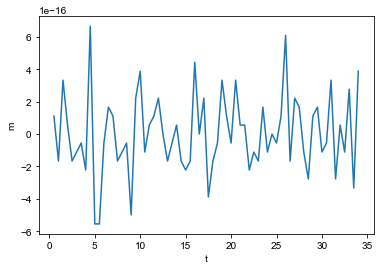

In [ ]:
#Conservación de masa

plt.plot(datos_evolucion[:,0], datos_evolucion[:,1], label='Masa(t)')
#Parámetros del gráfico:
# plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('m');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))



# #Guardo el gráfico
# plt.savefig('sol_aprox.pdf', format='pdf',bbox_inches = "tight")


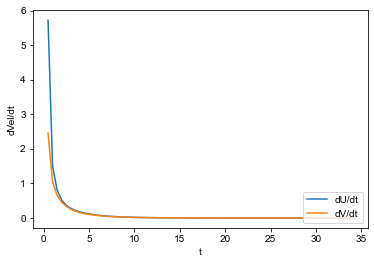

In [ ]:
#dUdt y dVdt

#Grafico

#Conservación de masa
plt.plot(datos_evolucion[:,0], datos_evolucion[:,2], label='dU/dt')
plt.plot(datos_evolucion[:,0], datos_evolucion[:,3], label='dV/dt')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('dVel/dt');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

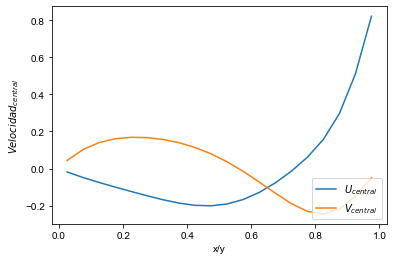

In [ ]:
#Velocidad central

#Grafico


plt.plot(datos_velocidad[:,0], datos_velocidad[:,1], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], datos_velocidad[:,2], label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('x/y')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

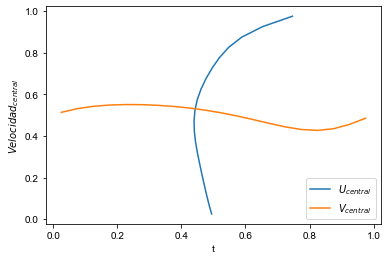

In [ ]:
#Velocidad central adimensionalizada y graficada sobre el recinto

#Grafico

amplitud = 0.3
plt.plot(amplitud*datos_velocidad[:,1] + 0.5, datos_velocidad[:,0], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], amplitud*datos_velocidad[:,2] + 0.5, label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

### Inciso a

Grafico u y v en el centro en función de deltat para ver si cambia con deltat

In [8]:
#Importo datos
datos = genfromtxt('datos/a_velcentral.csv', delimiter=',')


FileNotFoundError: datos/a_velcentral.csv not found.

In [ ]:
dt_array = datos[:,0]
Ucentro_array = datos[:,1]
Vcentro_array = datos[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

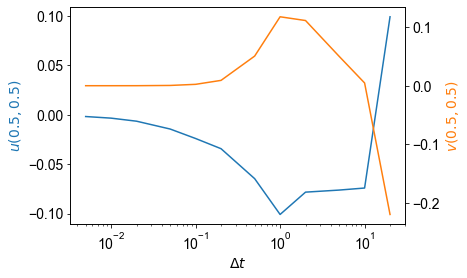

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()



ax1.plot(dt_array, Ucentro_array, color = "tab:blue")
ax2.plot(dt_array, Vcentro_array, color = "tab:orange")

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')


# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
ax1.set_xlabel('$\Delta t$')
ax1.set_ylabel('$u(0.5,0.5)$', color = "tab:blue")
ax2.set_ylabel('$v(0.5,0.5)$', color = "tab:orange")

# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('a_vel_vs_dt.pdf', format='pdf',bbox_inches = "tight")

In [ ]:
#Calculo para cada velocidad la desviación estándar dividida el promedio para darme una idea de la variabilidad del resultado en función de dt
print("Velocidad u: ", np.std(Ucentro_array)/np.mean(Ucentro_array))
print("Velocidad v: ", np.std(Vcentro_array)/np.mean(Vcentro_array))

### Inciso b
Grafico para DC2 los errores respecto a los resultados de Guia

In [17]:
#Resultados de Guia: (copiados directamente del paper)
#orden: Re: [100, 1000, 5000]
guia_ucentral = np.array([-0.20581, -0.06080, -0.03039])
guia_vcentral = np.array([0.05454, 0.02526, 0.00945])

In [18]:
#Cargo datos
datos_u_DC2 = genfromtxt('datos/b_ucentral.csv', delimiter=',')
datos_v_DC2 = genfromtxt('datos/b_vcentral.csv', delimiter=',')

In [19]:
def errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral):
    #Calcula los errores considerando que se cambió el esquema del término advectivo
    #datos_u: datos de la velocidad u central
    #datos_v: datos de la velocidad v central
    #guia_ucentral: datos de la velocidad u central de Guia
    #guia_vcentral: datos de la velocidad v central de Guia

    #Creo la matriz de errores que calcula cuadráticamente los errores para cada valor de n1 y Re
    errores = np.zeros(datos_u.shape)
    for i in range(datos_u.shape[0]):
        for j in range(datos_u.shape[1]):
            modulo = guia_ucentral[j]**2 + guia_vcentral[j]**2
            errores[i,j] = np.sqrt((datos_u[i,j] - guia_ucentral[j])**2 + (datos_v[i,j] - guia_vcentral[j])**2)/modulo
            
    return errores

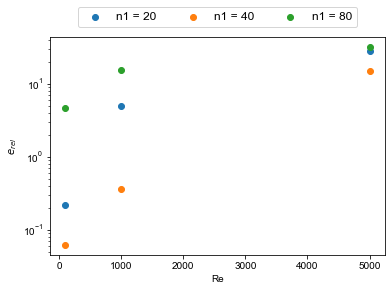

In [20]:
#Calculo los errores
errores_DC2 = errores_advectivo(datos_u_DC2, datos_v_DC2, guia_ucentral,guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores_DC2[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_DC2.pdf', format='pdf',bbox_inches = "tight")

### Inciso c
Es hacer lo mismo que el b pero con otros datos (que se produjeron usando como término advectivo UP1 y QUICK)

In [21]:
#Cargo datos
datos_u_UP1 = genfromtxt('datos/c_ucentral_U.csv', delimiter=',')
datos_v_UP1 = genfromtxt('datos/c_vcentral_U.csv', delimiter=',')
datos_u_QUICK = genfromtxt('datos/c_ucentral_Q.csv', delimiter=',')
datos_v_QUICK = genfromtxt('datos/c_vcentral_Q.csv', delimiter=',')


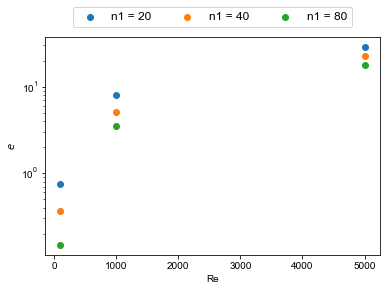

In [22]:
#Calculo los errores
errores_UP1 = errores_advectivo(datos_u_UP1, datos_v_UP1, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores_UP1[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_UP1.pdf', format='pdf',bbox_inches = "tight")

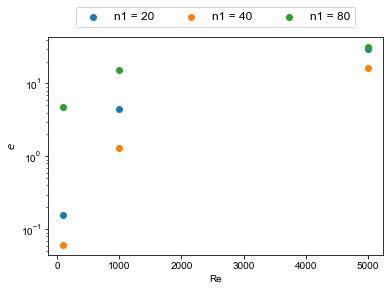

In [23]:
#Calculo los errores
errores_QUICK = errores_advectivo(datos_u_QUICK, datos_v_QUICK, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores_QUICK[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('termino_adv_QUICK.pdf', format='pdf',bbox_inches = "tight")

In [49]:
#Comparo para cada Re el error de UP1, QUICK y DC2 con distintos n1
#Esta comparación voy a hacerla directamente con una tabla. Si no, estoy representando el mismo contenido de una tabla en un gráfico.



# i = 0 #Nro de Re
# #Grafico errores_DC2 vs n1 para Re
# errores_metodos_n1 = np.array([errores_DC2[i,:], errores_UP1[i,:], errores_QUICK[i,:]])

# for j in range(3):
#     plt.subplot(1,3,j+1)
#     for k in range(3):
#         plt.ylabel('$e$')
#         plt.scatter(n1_array[j], errores_metodos_n1[k,j]);
#         plt.xlabel('n1')




# # plt.subplot(1,3,2)
# # plt.scatter(n1_array, errores_UP1[i,:], label='UP1, Re = ' + str(Re_array[i]));
# # plt.subplot(1,3,3)
# # plt.scatter(n1_array, errores_QUICK[i,:], label='QUICK, Re = ' + str(Re_array[i]));

# #Parámetros del gráfico:
# # plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)


# plt.ylabel('$e$')
# # plt.xticks(x, my_xticks)
# # plt.yticks(np.arange(y.min(), y.max(), 0.005))
# # plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# # plt.xlim(10.0**-4, 10.0**0)
# # plt.xscale("log")
# # plt.yscale("log")

# #Guardo el gráfico
# plt.savefig('c_error_QUICK_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

### Inciso d
Calculo el orden de convergencia espacial de UP1 en el cálculo de las velocidades en 2 puntos distintos.

In [51]:
#Cargo datos


datos_erroru_1 = genfromtxt("datos/d_error_uparticular_Re1.csv",delimiter = ',')
datos_errorv_1 = genfromtxt("datos/d_error_vparticular_Re1.csv",delimiter = ',')

# datos_erroru_1000 = genfromtxt("datos/d_error_uparticular_Re1000.csv",delimiter = ',')
# datos_errorv_1000 = genfromtxt("datos/d_error_vparticular_Re1000.csv",delimiter = ',')


# datos_u_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_v_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_u_UP1 = genfromtxt('datos/d_u_UP1.csv', delimiter=',')
# datos_v_UP1 = genfromtxt('datos/d_v_UP1.csv', delimiter=',')

Orden de convergencia:  2.5279722490866563 +/- 0.25890392418605823
Orden de convergencia:  2.88403428611868 +/- 0.4040887289633906


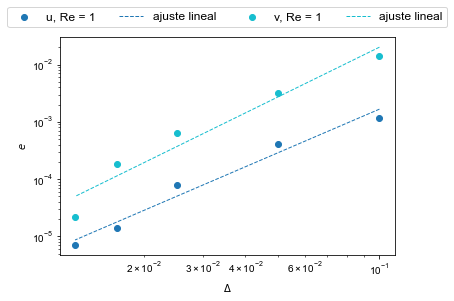

In [62]:
#Calculo los errores
# errores = errores_advectivo(datos_u_UP1, datos_v_UP1, datos_u_solucion, datos_v_solucion)

#Grafico los errores vs n1, una curva para cada Re y los ajustes lineales
Re_array = np.array([1,1000])
n1_array = np.array([10,20,40,60,80])
Delta_array = np.zeros(len(n1_array))
for i in range(len(n1_array)):
    Delta_array[i] = 1/n1_array[i]

plt.scatter(Delta_array, datos_erroru_1, label='u, Re = 1', color = "tab:blue")
datos = datos_erroru_1
limits = [0,len(datos[:])]
x, y = Delta_array, datos[limits[0]:limits[1]]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:blue", linestyle = "dashed")

plt.scatter(Delta_array, datos_errorv_1, label='v, Re = 1', color = "tab:cyan")
datos = datos_errorv_1
limits = [0,len(datos[:])]
x, y = Delta_array, datos[limits[0]:limits[1]]
coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
m, b = coefs[0], coefs[1]
print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:cyan", linestyle = "dashed")



# plt.plot(Delta_array, datos_erroru_1, label='u,Re = 1000', color = "tab:red")
# datos = datos_erroru_1
# limits = [0,len(datos[:])]
# x, y = Delta_array, datos[limits[0]:limits[1]]
# coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
# m, b = coefs[0], coefs[1]
# print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
# plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:red", linestyle = "dashed")

# plt.plot(Delta_array, datos_errorv_1, label='v,Re = 1000', color = "orange")
# datos = datos_errorv_1
# limits = [0,len(datos[:])]
# x, y = Delta_array, datos[limits[0]:limits[1]]
# coefs, matrix_cov = np.polyfit(np.log(x), np.log(np.abs(y)), 1, cov = True)
# m, b = coefs[0], coefs[1]
# print("Orden de convergencia: ", m, "+/-", matrix_cov[0,0]**0.5)
# plt.plot(x, np.exp(m*np.log(x) + b), label='ajuste lineal',linewidth=1, color = "tab:orange", linestyle = "dashed")





#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$\Delta$')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
plt.yscale("log")


#Guardo el gráfico
plt.savefig('error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

In [63]:
# plt.plot(Delta_array, datos_errorv_1, label='v, Re = 1')
# plt.plot(Delta_array, datos_errorv_1000, label='v,Re = 1000')

# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
# plt.xlabel('$\Delta$')
# plt.ylabel('$e$')

# plt.xscale("log")

# plt.savefig('d_error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

### Inciso e

No va a haber gráfico. Voy a tener que ejecutar el código e ir copiando los resultados directamente en el .tex

### Inciso f

Ídem al anterior

### Inciso g

Grafico la evolución temporal de u(0.5,0.5) y v(0.5,0.5) para distintos lsimpler y distintos métodos de evolución temporal

In [ ]:
#Importo datos

datos_1E =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalE.csv", delimiter=',')
datos_1C =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalC.csv", delimiter=',')
datos_3E =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalE.csv", delimiter=',')
datos_3C =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalC.csv", delimiter=',')


In [ ]:
#Grafico la evolución para distintos nsimpler y metodos de evolución temporal
#1 gráfico para u y otro para v


#tiempo: datos_1E[:,0]
# datos_1E[:,2]
# datos_1E[:,3]




